In [57]:
import pandas as pd

In [58]:
cd ~/workspace/theislab/mubind-pipeline/notebooks/pipeline/02_results

/mnt/c/Users/IgnacioIbarra/Dropbox/workspace/theislab/mubind-pipeline/notebooks/pipeline/02_results


In [59]:
df = pd.read_csv('../results_scbasset.csv',
                 index_col=0)
df

,dataset,feat_selection,loss_key,group,metric,value,model_path,n_obs,time,model,n_epochs
0,noack_2022,random,poisson,train,roc_auc,NaN,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,187.031928,scBasset,10
1,noack_2022,random,poisson,train,pr_auc,NaN,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,187.031928,scBasset,10
2,noack_2022,random,poisson,train,r2,0.075192,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,187.031928,scBasset,10
3,noack_2022,random,poisson,val,roc_auc,0.698906,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,187.031928,scBasset,10
4,noack_2022,random,poisson,val,pr_auc,0.194494,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,187.031928,scBasset,10
...,...,...,...,...,...,...,...,...,...,...,...
4,pbmc,episcanpy,bce,val,pr_auc,0.568809,/mnt/f/workspace/theislab/mubind/data/pbmc/epi...,NaN,NaN,scBasset,20
5,pbmc,episcanpy,bce,val,r2,-0.027791,/mnt/f/workspace/theislab/mubind/data/pbmc/epi...,NaN,NaN,scBasset,20
6,pbmc,episcanpy,bce,test,roc_auc,0.603354,/mnt/f/workspace/theislab/mubind/data/pbmc/epi...,NaN,NaN,scBasset,20
7,pbmc,episcanpy,bce,test,pr_auc,0.588223,/mnt/f/workspace/theislab/mubind/data/pbmc/epi...,NaN,NaN,scBasset,20


In [60]:
df_mubind = pd.read_csv('../results_mubind.csv',
                 index_col=0)

In [61]:
import numpy as np
import seaborn as sns
res = pd.concat([df, df_mubind])
res['k'] = np.where(res['model'] == 'scBasset',
                    res['dataset'] + ':' + res['feat_selection'] + ':' + res['loss_key'] + ':' + res['model'],
                    res['dataset'] + ':' + res['feat_selection'] + ':' + res['model'])

In [62]:
df_mubind

,dataset,group,feat_selection,metric,value,time,model_path,n_obs,model
0,noack_2022,train,mubind_output,roc_auc,0.528740,483.511847,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,mubind
1,noack_2022,train,mubind_output,pr_auc,0.081487,483.511847,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,mubind
2,noack_2022,train,mubind_output,r2,0.180875,483.511847,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,mubind
3,noack_2022,val,mubind_output,roc_auc,0.499457,483.511847,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,mubind
4,noack_2022,val,mubind_output,pr_auc,0.073926,483.511847,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,mubind
...,...,...,...,...,...,...,...,...,...
4,pbmc,val,mubind_output,pr_auc,0.003381,436.836211,/mnt/f/workspace/theislab/mubind/data/pbmc/epi...,500,mubind
5,pbmc,val,mubind_output,r2,-0.005626,436.836211,/mnt/f/workspace/theislab/mubind/data/pbmc/epi...,500,mubind
6,pbmc,test,mubind_output,roc_auc,0.605923,436.836211,/mnt/f/workspace/theislab/mubind/data/pbmc/epi...,500,mubind
7,pbmc,test,mubind_output,pr_auc,0.004561,436.836211,/mnt/f/workspace/theislab/mubind/data/pbmc/epi...,500,mubind


In [63]:
res['k'] = np.where(res['model'] == 'scBasset',
                    res['model'] + ':' + res['feat_selection'] + ':' + res['loss_key'],
                    res['model'] + ':' + res['feat_selection'])

list(res[(res['k'] == 'scBasset:random:bce') & (res['dataset'] == 'pancreatic_endocrinogenesis') & (res['metric'] == 'roc_auc') & (res['n_obs'] == 500)]['model_path']) # .value_counts()

[]

In [64]:
res[res['model_path'] == '/mnt/f/workspace/theislab/mubind/data/noack_2022/random/scbasset_output/obs500_e10/bce/best_model.h5']

,dataset,feat_selection,loss_key,group,metric,value,model_path,n_obs,time,model,n_epochs,k
0,noack_2022,random,bce,train,roc_auc,0.741921,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,222.65178,scBasset,10.0,scBasset:random:bce
1,noack_2022,random,bce,train,pr_auc,0.229103,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,222.65178,scBasset,10.0,scBasset:random:bce
2,noack_2022,random,bce,train,r2,0.081677,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,222.65178,scBasset,10.0,scBasset:random:bce
3,noack_2022,random,bce,val,roc_auc,0.692284,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,222.65178,scBasset,10.0,scBasset:random:bce
4,noack_2022,random,bce,val,pr_auc,0.199333,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,222.65178,scBasset,10.0,scBasset:random:bce
5,noack_2022,random,bce,val,r2,0.052111,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,222.65178,scBasset,10.0,scBasset:random:bce
6,noack_2022,random,bce,test,roc_auc,0.665801,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,222.65178,scBasset,10.0,scBasset:random:bce
7,noack_2022,random,bce,test,pr_auc,0.145950,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,222.65178,scBasset,10.0,scBasset:random:bce
8,noack_2022,random,bce,test,r2,0.038973,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,222.65178,scBasset,10.0,scBasset:random:bce


In [65]:
res[res['n_obs'] == '100']

,dataset,feat_selection,loss_key,group,metric,value,model_path,n_obs,time,model,n_epochs,k
0,pancreatic_endocrinogenesis,random,poisson,train,roc_auc,0.509259,/mnt/f/workspace/theislab/mubind/data/pancreat...,100,15.634558,scBasset,1.0,scBasset:random:poisson
1,pancreatic_endocrinogenesis,random,poisson,train,pr_auc,0.054950,/mnt/f/workspace/theislab/mubind/data/pancreat...,100,15.634558,scBasset,1.0,scBasset:random:poisson
2,pancreatic_endocrinogenesis,random,poisson,train,r2,-2.989757,/mnt/f/workspace/theislab/mubind/data/pancreat...,100,15.634558,scBasset,1.0,scBasset:random:poisson
3,pancreatic_endocrinogenesis,random,poisson,val,roc_auc,0.495405,/mnt/f/workspace/theislab/mubind/data/pancreat...,100,15.634558,scBasset,1.0,scBasset:random:poisson
4,pancreatic_endocrinogenesis,random,poisson,val,pr_auc,0.103700,/mnt/f/workspace/theislab/mubind/data/pancreat...,100,15.634558,scBasset,1.0,scBasset:random:poisson
...,...,...,...,...,...,...,...,...,...,...,...,...
4,pancreatic_endocrinogenesis,episcanpy,bce,val,pr_auc,0.673864,/mnt/f/workspace/theislab/mubind/data/pancreat...,100,187.291645,scBasset,20.0,scBasset:episcanpy:bce
5,pancreatic_endocrinogenesis,episcanpy,bce,val,r2,-0.006776,/mnt/f/workspace/theislab/mubind/data/pancreat...,100,187.291645,scBasset,20.0,scBasset:episcanpy:bce
6,pancreatic_endocrinogenesis,episcanpy,bce,test,roc_auc,0.653421,/mnt/f/workspace/theislab/mubind/data/pancreat...,100,187.291645,scBasset,20.0,scBasset:episcanpy:bce
7,pancreatic_endocrinogenesis,episcanpy,bce,test,pr_auc,0.632552,/mnt/f/workspace/theislab/mubind/data/pancreat...,100,187.291645,scBasset,20.0,scBasset:episcanpy:bce


In [66]:
# decoy max - fix for ms release
# res['n_obs'] = np.where(res['n_obs'] == 'ALL', res['n_obs'][res['n_obs'] != 'ALL'].astype(int).max() * 3, res['n_obs'])
# res['n_obs'] = res['n_obs'].astype(int)

In [67]:
print(res['model'].value_counts())

model
scBasset    1458
mubind       216
Name: count, dtype: int64


In [68]:
import warnings
warnings.filterwarnings("ignore")


In [69]:
res[res['model'] == 'mubind']

,dataset,feat_selection,loss_key,group,metric,value,model_path,n_obs,time,model,n_epochs,k
0,noack_2022,mubind_output,NaN,train,roc_auc,0.528740,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,483.511847,mubind,NaN,mubind:mubind_output
1,noack_2022,mubind_output,NaN,train,pr_auc,0.081487,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,483.511847,mubind,NaN,mubind:mubind_output
2,noack_2022,mubind_output,NaN,train,r2,0.180875,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,483.511847,mubind,NaN,mubind:mubind_output
3,noack_2022,mubind_output,NaN,val,roc_auc,0.499457,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,483.511847,mubind,NaN,mubind:mubind_output
4,noack_2022,mubind_output,NaN,val,pr_auc,0.073926,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,483.511847,mubind,NaN,mubind:mubind_output
...,...,...,...,...,...,...,...,...,...,...,...,...
4,pbmc,mubind_output,NaN,val,pr_auc,0.003381,/mnt/f/workspace/theislab/mubind/data/pbmc/epi...,500,436.836211,mubind,NaN,mubind:mubind_output
5,pbmc,mubind_output,NaN,val,r2,-0.005626,/mnt/f/workspace/theislab/mubind/data/pbmc/epi...,500,436.836211,mubind,NaN,mubind:mubind_output
6,pbmc,mubind_output,NaN,test,roc_auc,0.605923,/mnt/f/workspace/theislab/mubind/data/pbmc/epi...,500,436.836211,mubind,NaN,mubind:mubind_output
7,pbmc,mubind_output,NaN,test,pr_auc,0.004561,/mnt/f/workspace/theislab/mubind/data/pbmc/epi...,500,436.836211,mubind,NaN,mubind:mubind_output


In [70]:
res

,dataset,feat_selection,loss_key,group,metric,value,model_path,n_obs,time,model,n_epochs,k
0,noack_2022,random,poisson,train,roc_auc,NaN,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,187.031928,scBasset,10.0,scBasset:random:poisson
1,noack_2022,random,poisson,train,pr_auc,NaN,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,187.031928,scBasset,10.0,scBasset:random:poisson
2,noack_2022,random,poisson,train,r2,0.075192,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,187.031928,scBasset,10.0,scBasset:random:poisson
3,noack_2022,random,poisson,val,roc_auc,0.698906,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,187.031928,scBasset,10.0,scBasset:random:poisson
4,noack_2022,random,poisson,val,pr_auc,0.194494,/mnt/f/workspace/theislab/mubind/data/noack_20...,500,187.031928,scBasset,10.0,scBasset:random:poisson
...,...,...,...,...,...,...,...,...,...,...,...,...
4,pbmc,mubind_output,NaN,val,pr_auc,0.003381,/mnt/f/workspace/theislab/mubind/data/pbmc/epi...,500,436.836211,mubind,NaN,mubind:mubind_output
5,pbmc,mubind_output,NaN,val,r2,-0.005626,/mnt/f/workspace/theislab/mubind/data/pbmc/epi...,500,436.836211,mubind,NaN,mubind:mubind_output
6,pbmc,mubind_output,NaN,test,roc_auc,0.605923,/mnt/f/workspace/theislab/mubind/data/pbmc/epi...,500,436.836211,mubind,NaN,mubind:mubind_output
7,pbmc,mubind_output,NaN,test,pr_auc,0.004561,/mnt/f/workspace/theislab/mubind/data/pbmc/epi...,500,436.836211,mubind,NaN,mubind:mubind_output


In [71]:
res['feat_selection'] = np.where(res['model'] == 'mubind', res['model_path'].str.split('/').str[-5], res['feat_selection'])


In [72]:
res['value'][res['value'] < 0] = 0

noack_2022 train
r2 episcanpy
r2 random
roc_auc episcanpy
roc_auc random
pr_auc episcanpy
pr_auc random


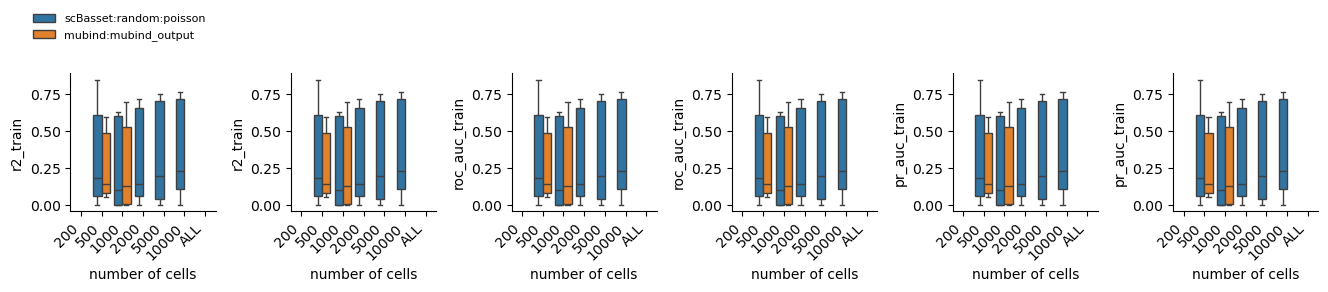

AssertionError: 

In [78]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 20, 3

for dataset_id, grp in res.groupby('dataset'):
    for group in ['train', 'test']:
        print(dataset_id, group)
        pi = 0
        for metric in ['r2', 'roc_auc', 'pr_auc']:
            for k, grp2 in grp[(grp['group'] == group) & (grp['metric'] == metric)].groupby('feat_selection'):
                print(metric, k)
                # print(grp2['model'].value_counts())
                # if k[-1] != 'test':
                #     continue
                # print(grp2['model'].value_counts())
                grp2['k'] = np.where(grp2['model'] == 'scBasset',
                                    grp2['model'] + ':' + grp2['feat_selection'] + ':' + grp2['loss_key'] + ':',
                                    grp2['model'] + ':' + grp2['feat_selection'])

                grp2['k2'] = grp2['k'] + ':' + grp2['n_obs'].astype(str)

                grp2 = grp2.sort_values('n_epochs', ascending=False).groupby('k2').head(1)

                ax = plt.subplot(1, 9, pi + 1)
                # sns.pointplot(grp2.reset_index(drop=True),
                #               x='n_obs',
                #               y='value',
                #               hue='k',
                #               scale=.9,
                #               ax=ax,
                #               linestyles=['-', '--', '-'],
                #               markers=['o','v', 's'],
                #               palette=['lightgray', 'gray', 'green']) 
                                
                sns.boxplot(data=grp.reset_index(),
                            x='n_obs',
                            y='value',
                            order=['200', '500', '1000', '2000', '5000', '10000', 'ALL'],
                            hue_order=['scBasset:random:poisson', 'mubind:mubind_output'], #  'scBasset:episcanpy:poisson', 'scBasset:episcanpy:bce', 'mubind:mubind_output'],
                            ax=ax,
                            hue='k')
                            # scale=.9)
                            # linestyles=['-', '--', '-'],
                            # markers=['o','v', 's'],
                            # palette=['lightgray', 'gray', 'green']) 
                plt.xticks(rotation=45, ha='right')
                plt.xlabel('number of cells')
                plt.ylabel(metric + '_' + group)
                plt.legend(fontsize=6)
                # plt.title(k + '_' + group + '_' + metric)
                ax.spines[['right', 'top']].set_visible(False)
                ax.legend(loc='upper right',
                          bbox_to_anchor=(1,1.5),
                          frameon=False,
                          fontsize=8)
                if pi != 0:
                    ax.get_legend().remove()
                pi += 1
                plt.tight_layout()

        plt.show()
        assert False

0    0.638501
1    0.097333
2   -0.140095
3    0.647948
4    0.079246
       ...   
4    0.003381
5   -0.005626
6    0.605923
7    0.004561
8   -0.006117
Name: value, Length: 504, dtype: float64

In [38]:
grp['']

,dataset,feat_selection,loss_key,group,metric,value,model_path,n_obs,time,model,n_epochs,k
0,pbmc,random,poisson,train,roc_auc,0.638501,/mnt/f/workspace/theislab/mubind/data/pbmc/ran...,500,225.567594,scBasset,10.0,scBasset:random:poisson
1,pbmc,random,poisson,train,pr_auc,0.097333,/mnt/f/workspace/theislab/mubind/data/pbmc/ran...,500,225.567594,scBasset,10.0,scBasset:random:poisson
2,pbmc,random,poisson,train,r2,-0.140095,/mnt/f/workspace/theislab/mubind/data/pbmc/ran...,500,225.567594,scBasset,10.0,scBasset:random:poisson
3,pbmc,random,poisson,val,roc_auc,0.647948,/mnt/f/workspace/theislab/mubind/data/pbmc/ran...,500,225.567594,scBasset,10.0,scBasset:random:poisson
4,pbmc,random,poisson,val,pr_auc,0.079246,/mnt/f/workspace/theislab/mubind/data/pbmc/ran...,500,225.567594,scBasset,10.0,scBasset:random:poisson
...,...,...,...,...,...,...,...,...,...,...,...,...
4,pbmc,episcanpy,NaN,val,pr_auc,0.003381,/mnt/f/workspace/theislab/mubind/data/pbmc/epi...,500,436.836211,mubind,NaN,mubind:mubind_output
5,pbmc,episcanpy,NaN,val,r2,-0.005626,/mnt/f/workspace/theislab/mubind/data/pbmc/epi...,500,436.836211,mubind,NaN,mubind:mubind_output
6,pbmc,episcanpy,NaN,test,roc_auc,0.605923,/mnt/f/workspace/theislab/mubind/data/pbmc/epi...,500,436.836211,mubind,NaN,mubind:mubind_output
7,pbmc,episcanpy,NaN,test,pr_auc,0.004561,/mnt/f/workspace/theislab/mubind/data/pbmc/epi...,500,436.836211,mubind,NaN,mubind:mubind_output


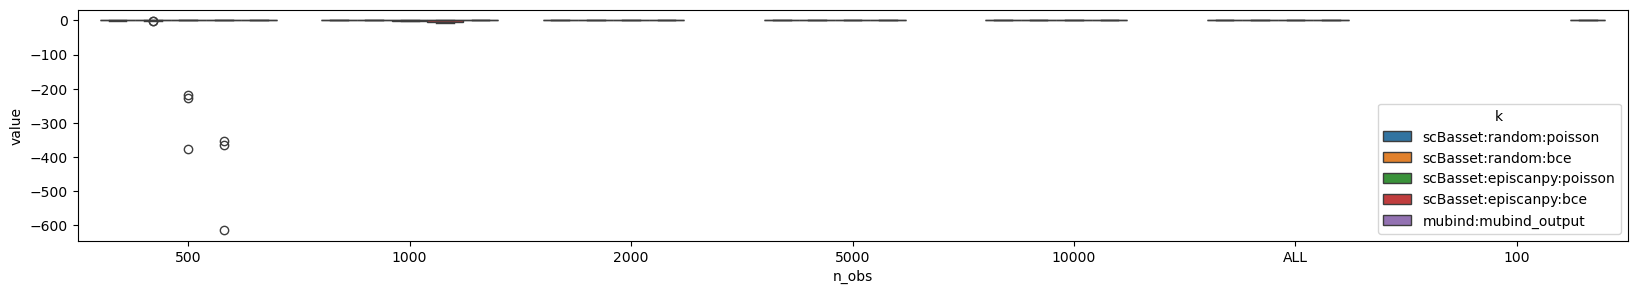